# Inverse Problem of the Lorenz System of Differential Equations

## Forward Problem

We consider the Lorenz system of differential equations for the position $p(t):=(x(t),y(t),z(t))$:

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

This is one of the classic systems in non-linear differential equations. It exhibits a range of different behaviors as the parameters $u:=(\sigma, \beta, \rho)$ are varied. Given the parameter $u$ and initial condition $p_o:=p(0)=(x_0,y_0,z_0)$, we define the following *forward mapping* by evloving the dynamics for $t\in[0,T]$:

$$
\mathcal{F}_{p_0} : \mathbb R^3 \to \mathcal C:=C([0,T]\to \mathbb R^3), \qquad u \mapsto p_T(\cdot)
$$

### Chaotic dynamics

First, we import the needed things from IPython, NumPy, Matplotlib and SciPy.

In [1]:
%matplotlib inline

In [2]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [3]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

### Computing the trajectories and plotting the result

We define a function that can integrate the differential equations numerically and then plot the solutions. This function has arguments that control the parameters of the differential equation $u=(\sigma, \beta, \rho)$, the numerical integration (`N`, `max_time`) and the visualization (`angle`).

In [4]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

Let's call the function once to view the solutions. For this set of parameters $u^\dagger=(\sigma^\dagger, \beta^\dagger, \rho^\dagger)=(10, 8/3, 28)$, we see the trajectories swirling around two points, called attractors. 

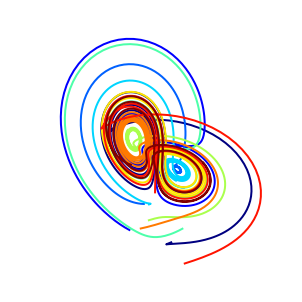

In [5]:
t, x_t = solve_lorenz(angle=0, N=10)

Using IPython's `interactive` function, we can explore how the trajectories behave as we change the various parameters.

In [6]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w)

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

The object returned by `interactive` is a `Widget` object and it has attributes that contain the current result and arguments:

In [7]:
# t, x_t = w.result

In [8]:
w.kwargs

{'N': 10,
 'angle': 0.0,
 'max_time': 5.1,
 'sigma': 7.6,
 'beta': 0.83333,
 'rho': 24.9}

### Averaging the trajectory

After interacting with the system, we can take the result and perform further computations. In this case, we compute the average positions in $x$, $y$ and $z$. Define the following foward map:

$$
\mathcal{G}_0(u) = \frac{1}{T}\int_0^T \mathcal{F}_{p_0}(u) dt
$$

Then the observations $p$ are obtained by observing (through operator $\mathcal{O}$) the trajectory (solved with $u^\dagger$) at $T$ discrete time points in the average summary:

$$
p = \overline{\mathcal{O} \mathcal{F}_{p_0}(u^\dagger)} := \frac{1}{T} \sum_{t=1}^T \mathcal{F}_{p_0}(u^\dagger)(t) \in \mathbb R^3
$$

In [43]:
xyz_avg = x_t.mean(axis=1)
xyz_avg.shape

(10, 250000, 3)

Creating histograms of the average positions (across different trajectories) show that on average the trajectories swirl about the attractors.

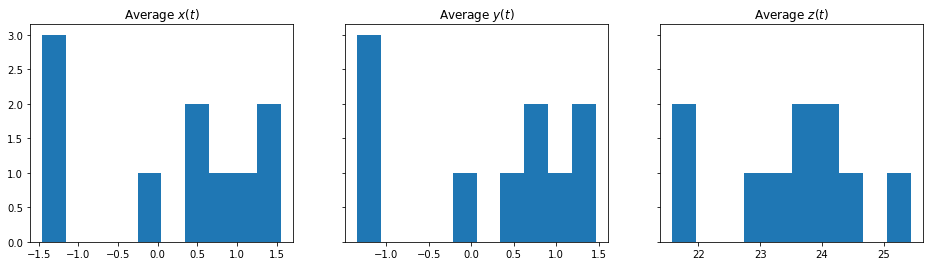

In [15]:
fig,axes = plt.subplots(nrows=1,ncols=3,sharex=False,sharey=True,figsize=(16,4))
for i, ax in enumerate(axes.flat):
    plt.axes(ax)
    plt.hist(xyz_avg[:,i])
    plt.title('Average $'+{0:'x',1:'y',2:'z'}[i]+'(t)$')

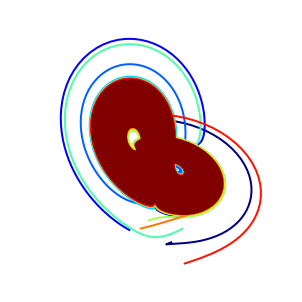

In [35]:
t, x_t = solve_lorenz(angle=0, N=10, max_time=1000)

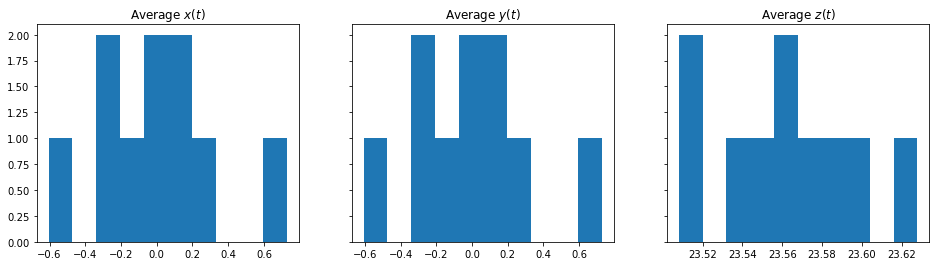

In [59]:
xyz_avg = x_t[:,500*250:,:].mean(axis=1)
fig,axes = plt.subplots(nrows=1,ncols=3,sharex=False,sharey=True,figsize=(16,4))
for i, ax in enumerate(axes.flat):
    plt.axes(ax)
    plt.hist(xyz_avg[:,i])
    plt.title('Average $'+{0:'x',1:'y',2:'z'}[i]+'(t)$')

## Inverse Problem

Note that the dynamics is chaotic, time averaged trajectory should converge to tractors. Finte time average as the observation can be modeled as follows:

$$
p = \mathcal{G}_0(u) + \epsilon, \quad \epsilon \sim N(0, \Gamma_\epsilon)
$$

Given prior $u\sim N(0, \Gamma_0)$, we can consider the inverse problem $u|p$. This is the time averaging approach adopted in CES paper.

### Task 1

Reproduce the result in CES paper.

### Task 2

Consider the spatiotemporal modeling.

Instead of averaging the trajectory, we fit the whole trajectory and define the following forward mapping:

$$
\mathcal{G}_1(u) = \mathcal{F}_{p_0}(u)(t), \quad t\in [0,T]
$$

We observe $p$ from the trajectory (solved with $u^\dagger$) at $T$ discrete time points:

$$
p = \overline{\mathcal{O} \mathcal{F}_{p_0}(u^\dagger)(t_n)}, \quad n=1, \cdots, T
$$

Therefore, $p$ becomes a $3\times T$ spatiotemporal observation matrix. We can consider the following likelihood model instead:

$$
p = \mathcal{G}_1(u) + \eta, \quad \eta \sim N(0, \Gamma_\eta), \quad \Gamma_\eta = C_x \otimes C_t
$$

We can investigate the trajectories.

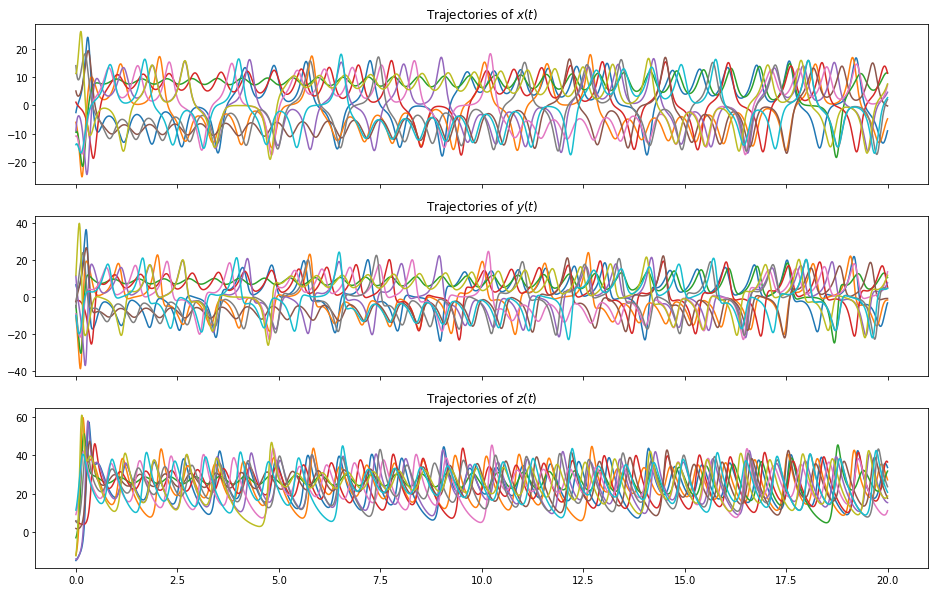

In [65]:
fig,axes = plt.subplots(nrows=3,ncols=1,sharex=True,sharey=False,figsize=(16,10))
for i, ax in enumerate(axes.flat):
    plt.axes(ax)
    plt.plot(t[:20*250], x_t[:,:20*250,i].T)
    plt.title('Trajectories of $'+{0:'x',1:'y',2:'z'}[i]+'(t)$')